# OpenPose PyTorch

## Repro [Github](https://github.com/Hzzone/pytorch-openpose)

In [1]:
!git clone https://github.com/Hzzone/pytorch-openpose
%cd pytorch-openpose

Cloning into 'pytorch-openpose'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 154 (delta 69), reused 152 (delta 67), pack-reused 0
Receiving objects: 100% (154/154), 20.18 MiB | 23.92 MiB/s, done.
Resolving deltas: 100% (69/69), done.
/kaggle/working/pytorch-openpose


In [2]:
import cv2
import matplotlib.pyplot as plt
import copy
import numpy as np

from src import model
from src import util
from src.body import Body
from src.hand import Hand

## set Pretrained Models

In [3]:
!cp /kaggle/input/openpose-pretrained-models/body_pose_model.pth model
!cp /kaggle/input/openpose-pretrained-models/hand_pose_model.pth model

In [4]:
body_estimation = Body('model/body_pose_model.pth')
hand_estimation = Hand('model/hand_pose_model.pth')

In [5]:
#test_image = 'images/demo.jpg'
test_image = '/kaggle/input/input-poses/baseball1.jpg'
#test_image = '/kaggle/input/input-poses/baseball2.jpg'
#test_image = '/kaggle/input/input-poses/baseketball.jpg'
#test_image = '/kaggle/input/input-poses/fall1.jpg'
#test_image = '/kaggle/input/input-poses/fall2.jpg'
#test_image = '/kaggle/input/input-poses/fall3.jpg'
#test_image = '/kaggle/input/input-poses/racers.jpg'
#test_image = '/kaggle/input/input-poses/skiing.jpg'
#test_image = '/kaggle/input/input-poses/tennis.jpg'
#test_image = '/kaggle/input/input-poses/volley.jpg'
#test_image = '/kaggle/input/input-poses/volleyball.jpg'

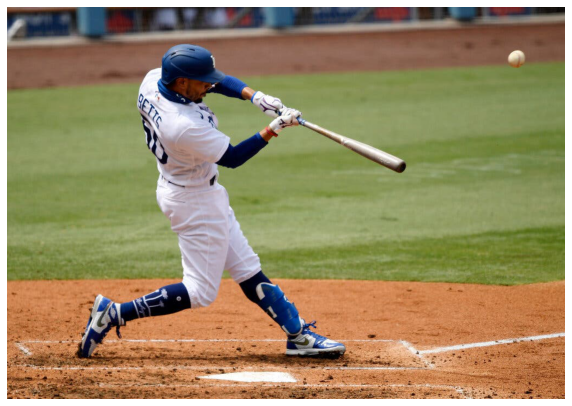

In [6]:
import matplotlib.pyplot as plt
image = plt.imread(test_image)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

## Detect Body

#### keypoints index : index = int(subset[n][i])
#### keypoints corrd : x,y = candidate[index][0:2]

18
1


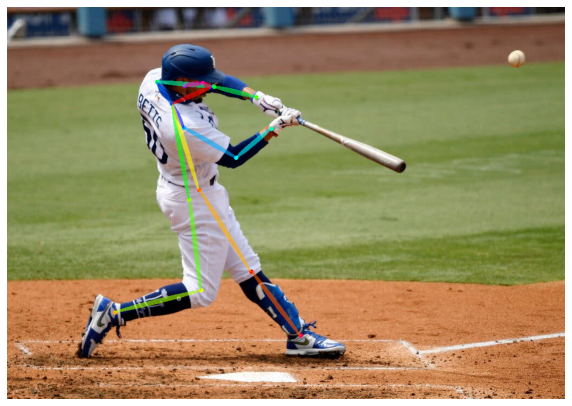

In [7]:
# enable GPU for acceleration
oriImg = cv2.imread(test_image)
candidate, subset = body_estimation(oriImg)
canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, subset)
print(len(candidate)) # number of keypoints
print(len(subset))    # number of persons

plt.figure(figsize=(10,10))
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

In [8]:
subset

array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
         5.        ,  6.        ,  7.        , 10.        , 11.        ,
        12.        , 13.        , 14.        , 15.        , 16.        ,
        -1.        , 17.        , -1.        , 27.48350203, 16.        ]])

## Detect Hand

In [9]:
# detect hand
hands_list = util.handDetect(candidate, subset, oriImg)
print(hands_list)

all_hand_peaks = []
for x, y, w, is_left in hands_list:
    peaks = hand_estimation(oriImg[y:y+w, x:x+w, :])
    peaks[:, 0] = np.where(peaks[:, 0]==0, peaks[:, 0], peaks[:, 0]+x)
    peaks[:, 1] = np.where(peaks[:, 1]==0, peaks[:, 1], peaks[:, 1]+y)
    all_hand_peaks.append(peaks)

canvas = util.draw_handpose(canvas, all_hand_peaks)

[[411, 100, 142, True], [431, 130, 149, False]]


## Display Result

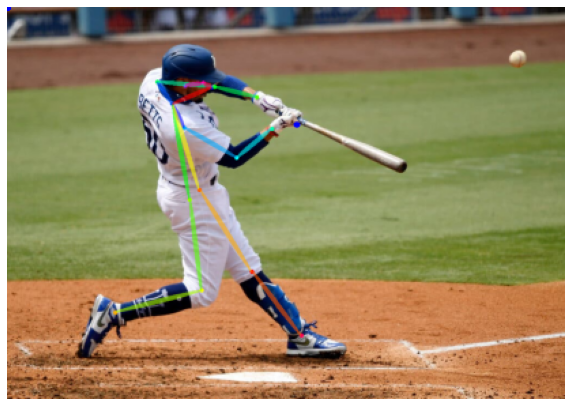

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

In [11]:
import os
import pandas as pd

base_dir = "/kaggle/input/state-farm-distracted-driver-detection/"
img_folder = os.path.join(base_dir, 'imgs/')
train_imgs = os.path.join(img_folder, 'train/')
test_imgs = os.path.join(img_folder, 'test/')
driver_imgs_list = pd.read_csv(os.path.join(base_dir, 'driver_imgs_list.csv'))
sample_sub = pd.read_csv(os.path.join(base_dir, 'sample_submission.csv'))

In [12]:
driver_imgs_list.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [13]:
TRAIN_DIR = '/kaggle/input/state-farm-distracted-driver-detection/imgs/train'
# directories = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

# for directory in directories:
#     for root, dirs, files in os.walk(TRAIN_DIR + '/' + directory):
#         for filename in files:
            
        

In [14]:
images = driver_imgs_list['img']
images.head()

0    img_44733.jpg
1    img_72999.jpg
2    img_25094.jpg
3    img_69092.jpg
4    img_92629.jpg
Name: img, dtype: object

In [15]:
def f1(s):
    image = TRAIN_DIR + '/' + s['classname'] + '/'+ s['img']
    oriImg = cv2.imread(image)
    assert oriImg is not None
    candidate, subset = body_estimation(oriImg)
    return {'candidate' : candidate, 'subset' : subset}


In [16]:
driver_imgs_list['pose'] = driver_imgs_list[:10].apply(f1, axis=1)

In [17]:
candidate

array([[3.75000000e+02, 1.47000000e+02, 8.38618398e-01, 0.00000000e+00],
       [3.02000000e+02, 1.77000000e+02, 8.93292665e-01, 1.00000000e+00],
       [3.24000000e+02, 2.21000000e+02, 8.64255548e-01, 2.00000000e+00],
       [4.20000000e+02, 2.76000000e+02, 8.53697240e-01, 3.00000000e+00],
       [4.85000000e+02, 2.23000000e+02, 9.41770434e-01, 4.00000000e+00],
       [2.75000000e+02, 1.37000000e+02, 7.17637241e-01, 5.00000000e+00],
       [3.80000000e+02, 1.46000000e+02, 5.89669287e-01, 6.00000000e+00],
       [4.57000000e+02, 1.65000000e+02, 9.12034869e-01, 7.00000000e+00],
       [5.86000000e+02, 3.00000000e+00, 1.17035151e-01, 8.00000000e+00],
       [6.90000000e+02, 3.00000000e+00, 1.46685630e-01, 9.00000000e+00],
       [3.34000000e+02, 3.53000000e+02, 8.06916773e-01, 1.00000000e+01],
       [3.56000000e+02, 5.19000000e+02, 9.94715393e-01, 1.10000000e+01],
       [1.98000000e+02, 5.60000000e+02, 8.63359332e-01, 1.20000000e+01],
       [3.52000000e+02, 3.35000000e+02, 6.26682281e

In [18]:
driver_imgs_list.head()

,subject,classname,img,pose
0,p002,c0,img_44733.jpg,"{'candidate': [[272.0, 111.0, 0.88398259878158..."
1,p002,c0,img_72999.jpg,"{'candidate': [[273.0, 117.0, 0.90350848436355..."
2,p002,c0,img_25094.jpg,"{'candidate': [[275.0, 117.0, 0.91929161548614..."
3,p002,c0,img_69092.jpg,"{'candidate': [[277.0, 118.0, 0.93203061819076..."
4,p002,c0,img_92629.jpg,"{'candidate': [[273.0, 116.0, 0.91887223720550..."


In [19]:
driver_imgs_list.to_csv('pose_images.csv')

In [20]:
import math
# draw the body keypoint and lims
def draw_bodypose(canvas, candidate, subset, filter):
    stickwidth = 4
    limbSeq = [[2, 3], [2, 6], [3, 4], [4, 5], [6, 7], [7, 8], [2, 9], [9, 10], \
               [10, 11], [2, 12], [12, 13], [13, 14], [2, 1], [1, 15], [15, 17], \
               [1, 16], [16, 18], [3, 17], [6, 18]]

    colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0], \
              [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255], \
              [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]
    
    points = {}
    
    for i in range(18):
        for n in range(len(subset)):
            index = int(subset[n][i])
            if index == -1:
                continue
            x, y = candidate[index][0:2]
            if i not in filter:
                continue
            cv2.circle(canvas, (int(x), int(y)), 4, colors[i], thickness=-1)
            cv2.putText(canvas, str(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 0), lineType=cv2.LINE_AA)
            points[i] = (int(x), int(y))
            
#     for i in range(17):
#         for n in range(len(subset)):
#             index = subset[n][np.array(limbSeq[i]) - 1]
#             if -1 in index:
#                 continue
#             cur_canvas = canvas.copy()
#             Y = candidate[index.astype(int), 0]
#             X = candidate[index.astype(int), 1]
#             mX = np.mean(X)
#             mY = np.mean(Y)
#             length = ((X[0] - X[1]) ** 2 + (Y[0] - Y[1]) ** 2) ** 0.5
#             angle = math.degrees(math.atan2(X[0] - X[1], Y[0] - Y[1]))
#             polygon = cv2.ellipse2Poly((int(mY), int(mX)), (int(length / 2), stickwidth), int(angle), 0, 360, 1)
#             cv2.fillConvexPoly(cur_canvas, polygon, colors[i])
#             canvas = cv2.addWeighted(canvas, 0.4, cur_canvas, 0.6, 0)
    # plt.imsave("preview.jpg", canvas[:, :, [2, 1, 0]])
    # plt.imshow(canvas[:, :, [2, 1, 0]])
    
    return canvas, points

In [21]:
test_image = '/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_1.jpg'

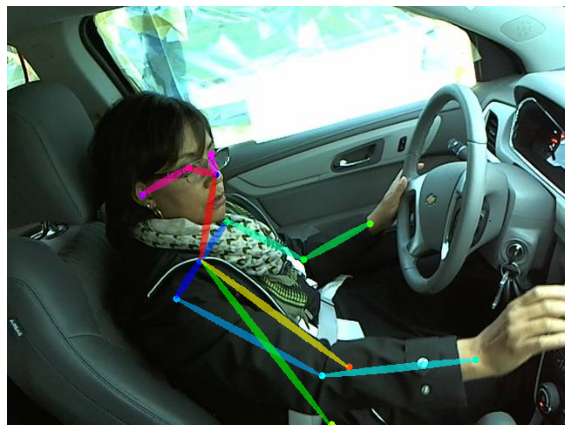

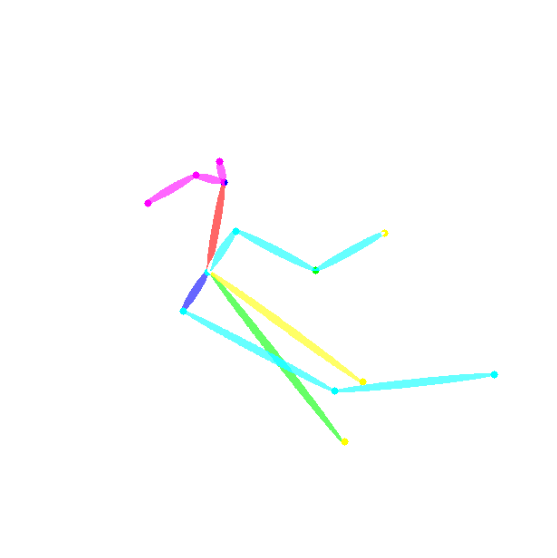

In [22]:
oriImg = cv2.imread(test_image)
candidate, subset = body_estimation(oriImg)
canvas = copy.deepcopy(oriImg)
blank_canvas = np.ones((600,600,3))
canvas = util.draw_bodypose(canvas, candidate, subset)
blank_canvas = util.draw_bodypose(blank_canvas, candidate, subset)

plt.figure(figsize=(10,10))
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(blank_canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

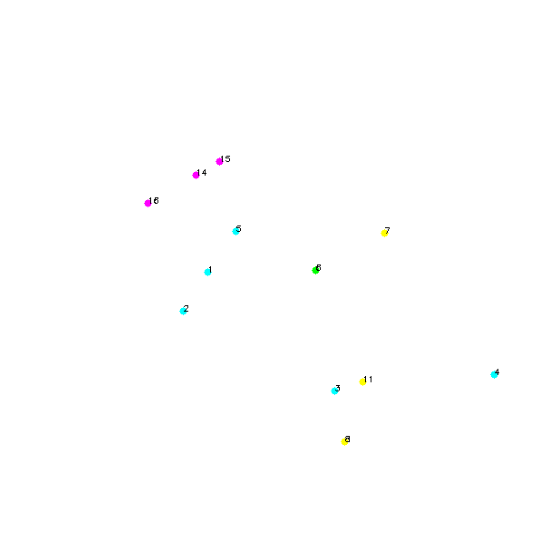

In [23]:
oriImg = cv2.imread(test_image)
candidate, subset = body_estimation(oriImg)
blank_canvas = np.ones((600,600,3))
filter = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
blank_canvas , points = draw_bodypose(blank_canvas, candidate, subset, filter)


plt.figure(figsize=(10,10))
plt.imshow(blank_canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

In [24]:
points

{1: (221, 292),
 2: (194, 335),
 3: (361, 423),
 4: (537, 405),
 5: (252, 247),
 6: (340, 290),
 7: (416, 249),
 8: (372, 479),
 11: (392, 413),
 14: (208, 185),
 15: (234, 170),
 16: (155, 216)}

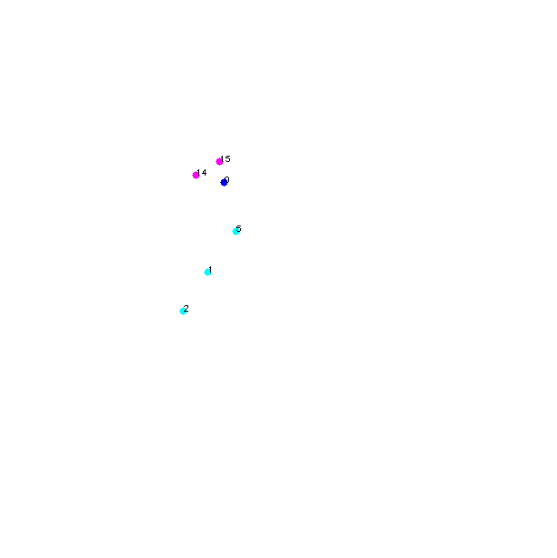

In [25]:
oriImg = cv2.imread(test_image)
candidate, subset = body_estimation(oriImg)
blank_canvas = np.ones((600,600,3))
filter = [14,15,0, 2 , 1 , 5]
blank_canvas , eyes_and_nose = draw_bodypose(blank_canvas, candidate, subset, filter)


plt.figure(figsize=(10,10))
plt.imshow(blank_canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

In [26]:
import math
def angle_eyes_and_nose(eyes_and_nose):
    if 14 not in eyes_and_nose.keys()  or 0 not in eyes_and_nose.keys() or 15 not in eyes_and_nose.keys():
        return -1
    
    A = eyes_and_nose[14]
    B = eyes_and_nose[0]
    C = eyes_and_nose[15]
    
    BA = (A[0] - B[0], A[1] - B[1])
    BC = (C[0] - B[0], C[1] - B[1])

    dot_product = BA[0] * BC[0] + BA[1] * BC[1]
    magnitude_AB = math.sqrt(BA[0] ** 2 + BA[1] ** 2)
    magnitude_BC = math.sqrt(BC[0] ** 2 + BC[1] ** 2)

    cosine_theta = dot_product / (magnitude_AB * magnitude_BC)
    angle_rad = math.acos(cosine_theta)
    angle_deg = math.degrees(angle_rad)
    
    return angle_deg

angle_eyes_and_nose(eyes_and_nose)

63.26493217204172

In [27]:
test_image2 = '/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c9/img_100090.jpg'

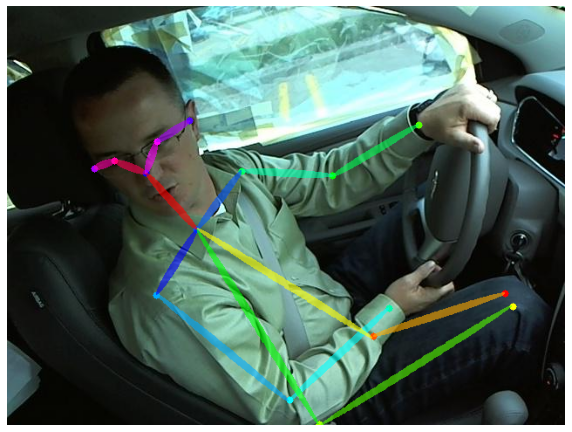

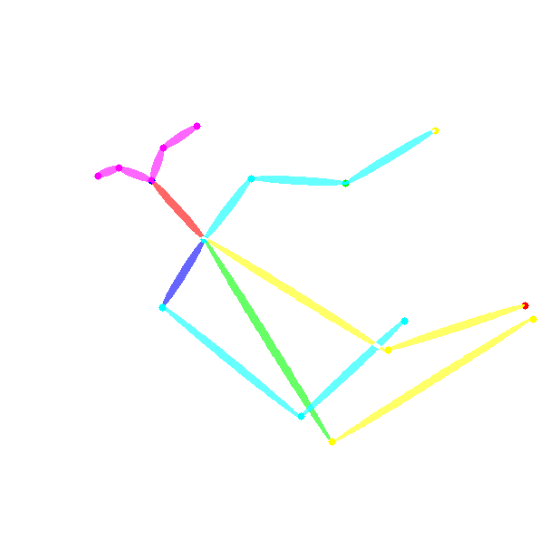

In [28]:
oriImg = cv2.imread(test_image2)
candidate, subset = body_estimation(oriImg)
canvas = copy.deepcopy(oriImg)
blank_canvas = np.ones((600,600,3))
canvas = util.draw_bodypose(canvas, candidate, subset)
blank_canvas = util.draw_bodypose(blank_canvas, candidate, subset)

plt.figure(figsize=(10,10))
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(blank_canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

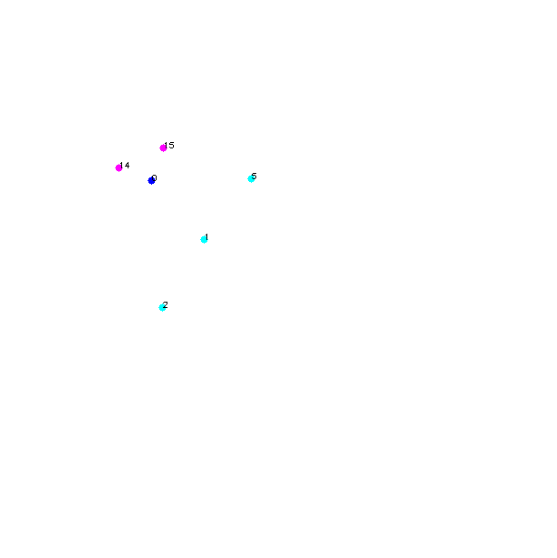

In [29]:
oriImg = cv2.imread(test_image2)
candidate, subset = body_estimation(oriImg)
blank_canvas = np.ones((600,600,3))
filter = [14,15,0, 2 , 1 , 5]
blank_canvas , eyes_and_nose = draw_bodypose(blank_canvas, candidate, subset, filter)


plt.figure(figsize=(10,10))
plt.imshow(blank_canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

In [30]:
angle_eyes_and_nose(eyes_and_nose)

88.60470886218782

In [31]:
def f2(s):
    image = TRAIN_DIR + '/' + s['classname'] + '/'+ s['img']
    oriImg = cv2.imread(image)
    assert oriImg is not None
    candidate, subset = body_estimation(oriImg)
    blank_canvas = np.ones((600,600,3))
    filter = [14,15,0, 2 , 1 , 5]
    blank_canvas , eyes_and_nose = draw_bodypose(blank_canvas, candidate, subset, filter)
    angle = angle_eyes_and_nose(eyes_and_nose)
    
    return angle 

In [32]:
driver_imgs_list_c0 = driver_imgs_list[driver_imgs_list['classname'] == 'c0'][:10]
driver_imgs_list_c0['pose'] = driver_imgs_list_c0.apply(f1, axis=1)
driver_imgs_list_c0['angle_eyes_and_nose'] = driver_imgs_list_c0.apply(f2, axis=1)

In [33]:
driver_imgs_list_c0

,subject,classname,img,pose,angle_eyes_and_nose
0,p002,c0,img_44733.jpg,"{'candidate': [[272.0, 111.0, 0.88398259878158...",59.400021
1,p002,c0,img_72999.jpg,"{'candidate': [[273.0, 117.0, 0.90350848436355...",52.545472
2,p002,c0,img_25094.jpg,"{'candidate': [[275.0, 117.0, 0.91929161548614...",49.398705
3,p002,c0,img_69092.jpg,"{'candidate': [[277.0, 118.0, 0.93203061819076...",50.617581
4,p002,c0,img_92629.jpg,"{'candidate': [[273.0, 116.0, 0.91887223720550...",53.130102
5,p002,c0,img_3370.jpg,"{'candidate': [[273.0, 117.0, 0.92260265350341...",51.736011
6,p002,c0,img_67639.jpg,"{'candidate': [[275.0, 116.0, 0.91455584764480...",52.276521
7,p002,c0,img_58560.jpg,"{'candidate': [[274.0, 117.0, 0.92914992570877...",51.938386
8,p002,c0,img_35779.jpg,"{'candidate': [[274.0, 117.0, 0.92886960506439...",51.938386
9,p002,c0,img_10012.jpg,"{'candidate': [[273.0, 117.0, 0.92982852458953...",59.805022


In [34]:
driver_imgs_list_c1 = driver_imgs_list[driver_imgs_list['classname'] == 'c1'][:10]
driver_imgs_list_c1['pose'] = driver_imgs_list_c1.apply(f1, axis=1)
driver_imgs_list_c1['angle_eyes_and_nose'] = driver_imgs_list_c1.apply(f2, axis=1)

In [35]:
driver_imgs_list_c1

,subject,classname,img,pose,angle_eyes_and_nose
76,p002,c1,img_16856.jpg,"{'candidate': [[285.0, 120.0, 0.94325786828994...",-1.000000
77,p002,c1,img_8410.jpg,"{'candidate': [[283.0, 113.0, 0.98625874519348...",56.441044
78,p002,c1,img_15559.jpg,"{'candidate': [[284.0, 116.0, 0.98663496971130...",57.828783
79,p002,c1,img_58564.jpg,"{'candidate': [[280.0, 110.0, 0.96733540296554...",45.481466
80,p002,c1,img_4562.jpg,"{'candidate': [[278.0, 108.0, 0.93204283714294...",33.690068
81,p002,c1,img_54810.jpg,"{'candidate': [[281.0, 113.0, 0.99164199829101...",50.225408
82,p002,c1,img_96357.jpg,"{'candidate': [[283.0, 104.0, 0.94710034132003...",48.030477
83,p002,c1,img_51439.jpg,"{'candidate': [[284.0, 111.0, 1.00775921344757...",47.997043
84,p002,c1,img_92674.jpg,"{'candidate': [[285.0, 106.0, 0.97020053863525...",50.111894
85,p002,c1,img_11478.jpg,"{'candidate': [[282.0, 104.0, 0.95947444438934...",46.276575


In [36]:
driver_imgs_list_c2 = driver_imgs_list[driver_imgs_list['classname'] == 'c2'][:10]
driver_imgs_list_c2['angle_eyes_and_nose'] = driver_imgs_list_c2.apply(f, axis=1)

NameError: name 'f' is not defined

In [ ]:
driver_imgs_list_c2

In [ ]:
driver_imgs_list_c3 = driver_imgs_list[driver_imgs_list['classname'] == 'c3'][:10]
driver_imgs_list_c3['angle_eyes_and_nose'] = driver_imgs_list_c3.apply(f, axis=1)

In [ ]:
driver_imgs_list_c3

In [ ]:
driver_imgs_list_c4 = driver_imgs_list[driver_imgs_list['classname'] == 'c4'][:10]
driver_imgs_list_c4['angle_eyes_and_nose'] = driver_imgs_list_c4.apply(f, axis=1)

In [ ]:
driver_imgs_list_c4

In [ ]:
driver_imgs_list_c5 = driver_imgs_list[driver_imgs_list['classname'] == 'c5'][:10]
driver_imgs_list_c5['angle_eyes_and_nose'] = driver_imgs_list_c5.apply(f, axis=1)

In [ ]:
driver_imgs_list_c5

In [ ]:
driver_imgs_list_c6 = driver_imgs_list[driver_imgs_list['classname'] == 'c6'][:10]
driver_imgs_list_c6['angle_eyes_and_nose'] = driver_imgs_list_c6.apply(f, axis=1)

In [ ]:
driver_imgs_list_c6

In [ ]:
driver_imgs_list_c7 = driver_imgs_list[driver_imgs_list['classname'] == 'c7'][:10]
driver_imgs_list_c7['angle_eyes_and_nose'] = driver_imgs_list_c7.apply(f, axis=1)

In [ ]:
driver_imgs_list_c7

In [ ]:
driver_imgs_list_c8 = driver_imgs_list[driver_imgs_list['classname'] == 'c8'][:10]
driver_imgs_list_c8['angle_eyes_and_nose'] = driver_imgs_list_c8.apply(f, axis=1)

In [ ]:
driver_imgs_list_c8

In [ ]:
driver_imgs_list_c9 = driver_imgs_list[driver_imgs_list['classname'] == 'c9'][:10]
driver_imgs_list_c9['angle_eyes_and_nose'] = driver_imgs_list_c9.apply(f, axis=1)

In [ ]:
driver_imgs_list_c9

In [37]:
import tensorflow as tf
import os

def download_model(model_type):
    server_prefix = 'https://omnomnom.vision.rwth-aachen.de/data/metrabs'
    model_zippath = tf.keras.utils.get_file(
        origin=f'{server_prefix}/{model_type}_20211019.zip',
        extract=True, cache_subdir='models')
    model_path = os.path.join(os.path.dirname(model_zippath), model_type)
    return model_path

model = tf.saved_model.load(download_model('metrabs_mob3l_y4t')) # or metrabs_eff2l_y4 for the big model
! wget -q https://raw.githubusercontent.com/isarandi/metrabs/master/img/test_image_3dpw.jpg
image = tf.image.decode_jpeg(tf.io.read_file('test_image_3dpw.jpg'))

41992192/41976188 [==============================] - 1s 0us/step



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

In [38]:
image = tf.image.decode_jpeg(tf.io.read_file('/kaggle/input/state-farm-distracted-driver-detection/imgs/train/c9/img_100090.jpg'))
test_image = tf.image.decode_jpeg(tf.io.read_file('/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_1.jpg'))

In [39]:
pred = model.detect_poses(image, skeleton='smpl_24')


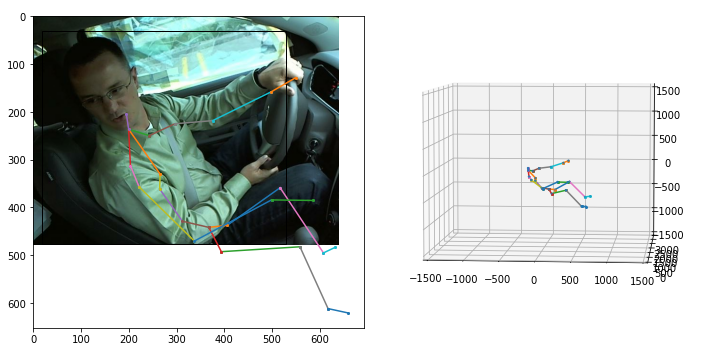

In [40]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d import Axes3D

def visualize(im, detections, poses3d, poses2d, edges):
    fig = plt.figure(figsize=(10, 5.2))
    image_ax = fig.add_subplot(1, 2, 1)
    image_ax.imshow(image)
    for x, y, w, h in detections[:, :4]:
        image_ax.add_patch(Rectangle((x, y), w, h, fill=False))

    pose_ax = fig.add_subplot(1, 2, 2, projection='3d')
    pose_ax.view_init(5, -85)
    pose_ax.set_xlim3d(-1500, 1500)
    pose_ax.set_zlim3d(-1500, 1500)
    pose_ax.set_ylim3d(0, 3000)

    # Matplotlib plots the Z axis as vertical, but our poses have Y as the vertical axis.
    # Therefore, we do a 90° rotation around the X axis:
    poses3d[..., 1], poses3d[..., 2] = poses3d[..., 2], -poses3d[..., 1]
    for pose3d, pose2d in zip(poses3d, poses2d):
        for i_start, i_end in edges:
            image_ax.plot(*zip(pose2d[i_start], pose2d[i_end]), marker='o', markersize=2)
            pose_ax.plot(*zip(pose3d[i_start], pose3d[i_end]), marker='o', markersize=2)
        image_ax.scatter(*pose2d.T, s=2)
        pose_ax.scatter(*pose3d.T, s=2)

    fig.tight_layout()
    plt.show()

visualize(
    image.numpy(),
    pred['boxes'].numpy(),
    pred['poses3d'].numpy(),
    pred['poses2d'].numpy(),
    model.per_skeleton_joint_edges['smpl_24'].numpy())